<a href="https://colab.research.google.com/github/gokul3r/NLP_UseCases/blob/main/Transformers_Question_Answering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quoting from the paper "[Attention is all you need](https://arxiv.org/abs/1706.03762)"

“The Transformer is the first transduction model relying entirely on self-attention to compute representations of its input and output without using sequence-aligned RNNs or convolution.”

Here, “transduction” means the conversion of input sequences into output sequences. The idea behind Transformer is to handle the dependencies between input and output with attention and recurrence completely.

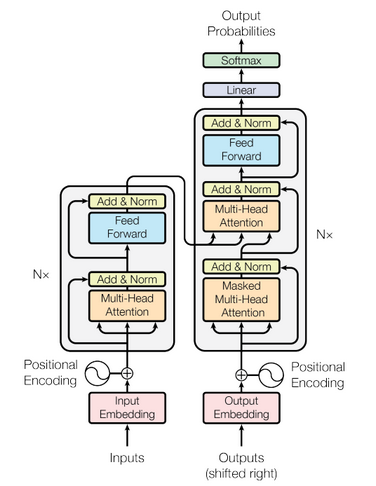

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 247 kB 5.4 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 1.2 MB 36.7 MB/s 
     |████████████████████████████████| 306 kB 35.2 MB/s 
     |████████████████████████████████| 3.4 MB 36.6 MB/s 
     |████████████████████████████████| 1.7 MB 38.9 MB/s 
     |████████████████████████████████| 9.2 MB 36.8 MB/s 
     |████████████████████████████████| 6.8 MB 23.5 MB/s 
     |████████████████████████████████| 3.3 MB 34.5 MB/s 
     |████████████████████████████████| 895 kB 40.0 MB/s 
     |████████████████████████████████| 596 kB 46.0 MB/s 
     |████████████████████████████████| 61 kB 495 kB/s 
     |████████████████████████████████| 180 kB 45.0 MB/s 
     |████████████████████████████████| 140 kB 43.5 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 1.1 MB 29.4 MB/s 
     |█████████████████

In [ ]:

from simpletransformers.question_answering import QuestionAnsweringModel,QuestionAnsweringArgs

model_args = QuestionAnsweringArgs(n_best_size=2,overwrite_output_dir=True,num_train_epochs = 5,save_model_every_epoch=True)
model = QuestionAnsweringModel(
    "roberta", "roberta-base", args = model_args
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForQuestionAnswering: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForQuestionAnswering were not initialized from the model checkpoint at roberta-base and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use 

In [ ]:
train_data = [
    {
        "context": "Mistborn is a series of epic fantasy novels written by American author Brandon Sanderson.",
        "qas": [
            {
                "id": "00001",
                "is_impossible": False,
                "question": "Who is the author of the Mistborn series?",
                "answers": [
                    {
                        "text": "Brandon Sanderson",
                        "answer_start": 71,
                    }
                ],
            }
        ],
    },
    {
        "context": "The first series, published between 2006 and 2008, consists of The Final Empire,"
                   "The Well of Ascension, and The Hero of Ages,"
                    "He created a movie called aladdin along with producer Mr.Arnold. The movie was published in 2020 but the result was not impressive",
        "qas": [
            {
                "id": "00002",
                "is_impossible": False,
                "question": "When was the series published?",
                "answers": [
                    {
                        "text": "between 2006 and 2008",
                        "answer_start": 28,
                    }
                ],
            },
            {
                "id": "00003",
                "is_impossible": False,
                "question": "What are the three books in the series?",
                "answers": [
                    {
                        "text": "The Final Empire, The Well of Ascension, and The Hero of Ages",
                        "answer_start": 63,
                    }
                ],
            },

            {
                "id": "00005",
                "is_impossible": False,
                "question": "What is the movie name produced?",
                "answers": [
                    {
                        "text": "aladdin",
                        "answer_start": 150,
                    }
                ],
            },

            {
                "id": "00004",
                "is_impossible": True,
                "question": "Who is the main character in the series?",
                "answers": [],
            },
        ],
    },
]

In [ ]:
model.train_model(train_data)

add example index and unique id: 100%|██████████| 5/5 [00:00<00:00, 34100.03it/s]


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

(5, 4.6265625)

In [ ]:
eval_data = [
    {
        "context": "The series primarily takes place in a region called the Final Empire "
                   "on a world called Scadrial, where the sun and sky are red, vegetation is brown, "
                   "and the ground is constantly being covered under black volcanic ashfalls.",
        "qas": [
            {
                "id": "00001",
                "is_impossible": False,
                "question": "Where does the series take place?",
                "answers": [
                    {
                        "text": "region called the Final Empire",
                        "answer_start": 38,
                    },
                    {
                        "text": "world called Scadrial",
                        "answer_start": 74,
                    },
                ],
            }
        ],
    },
    {
        "context": "\"Mistings\" have only one of the many Allomantic powers, while \"Mistborns\" have all the powers.",
        "qas": [
            {
                "id": "00002",
                "is_impossible": False,
                "question": "How many powers does a Misting possess?",
                "answers": [
                    {
                        "text": "one",
                        "answer_start": 21,
                    }
                ],
            },
            {
                "id": "00003",
                "is_impossible": True,
                "question": "What are Allomantic powers?",
                "answers": [],
            },
        ],
    },
]

In [ ]:
model.eval_model(eval_data)

add example index and unique id: 100%|██████████| 3/3 [00:00<00:00, 14529.92it/s]


Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

({'correct': 0, 'eval_loss': -0.1595458984375, 'incorrect': 1, 'similar': 2},
 {'correct_text': {},
  'incorrect_text': {'00002': {'predicted': 'while "Mistborns" have',
    'question': 'How many powers does a Misting possess?',
    'truth': 'one'}},
  'similar_text': {'00001': {'predicted': 'place in a region called the Final Empire on a world called Scadrial, where the sun and sky are red,',
    'question': 'Where does the series take place?',
    'truth': 'region called the Final Empire'},
   '00003': {'predicted': 'while "Mistborns" have',
    'question': 'What are Allomantic powers?',
    'truth': ''}}})

In [ ]:
context_text = "Mistborn is a series of epic fantasy novels written by American author Brandon Sanderson.The movie called aladdin earned 1 million dollars"

predictions, raw_outputs = model.predict(
    [
        {
            "context": context_text,
            "qas": [
                {
                    "question": "what is Mistborn?",
                    "id": "0",
                }
            ],
        }
    ], n_best_size=4
)

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 9642.08it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
predictions,raw_outputs

([{'answer': ['',
    'Mistborn is a series of epic fantasy novels written by American author Brandon Sanderson.The movie called aladdin'],
   'id': '0'}],
 [{'id': '0', 'probability': [0.362008239068571, 0.3371611528410781]}])